# July

## 26th

### (E) 876. Middle of the Linked List

Sample linked list for the test<br>
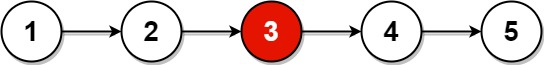

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

Get through all nodes first then do it again for a half of nodes - 48 / 78

In [ ]:
class Solution(object):
    def middleNode(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """

        cnt = 1
        cur, dummy = head, head
        while True:
          
          cur = cur.next
          if cur == None:
            break
          cnt += 1

        cnt = cnt // 2

        while True:

            if cnt == 0:
              break
            dummy = dummy.next
            cnt -= 1
        return dummy
        

Using fast and slow - 98 / 26

In [ ]:
class Solution(object):
    def middleNode(self, head):
        fast, slow = head, head

        while fast.next != None:

            if fast.next.next != None:
                fast = fast.next.next
                slow = slow.next
            else:
                fast = fast.next
                slow = slow.next
            
        return slow 

### (M) 98. Validate Binary Search Tree ★★

Sample BST for the test<br>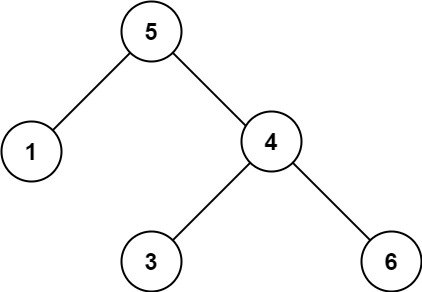

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(5)
root.left = TreeNode(1)

root.right = TreeNode(4)
root.right.left = TreeNode(3)

# root.right = TreeNode(5.5)
# root.right.left = TreeNode(5.2)

root.right.right = TreeNode(6)

Idea 1 : DFS - If we can reach all leafs without any problem -> True else False

In [ ]:
class Solution(object):
    def isValidBST(self, root):

      flag = True
      def isValid(flag, parent):

        if parent.left != None:
            if parent.left.val < parent.val: # left subtree must has lower value than parent
                pass
            else:
                flag = False

        if parent.right != None:
            if parent.right.val > parent.val: # left subtree must has lower value than parent
                pass
            else:
                flag = False
        return flag

      def func(flag, parent):

                
          # Stopper #
          if (parent.left == None) and (parent.right == None) :
            return

          # Second Stopper #
          flag = isValid(flag, parent)
          if flag == False:
            return flag

          # if didn't stop at 'Stopper', we gotta go to only one way
          for child in [parent.left, parent.right]:
            if child == None:
                continue
            func(flag, child)


      return False if func(flag, root) == False else True

print(Solution().isValidBST(root))

False


In [ ]:
flag = True

def isValid(flag, parent):
  if parent.left != None:
      if parent.left.val < parent.val: # left subtree must has lower value than parent
          pass
      else:
          flag = False

  if parent.right != None:
      if parent.right.val > parent.val: # left subtree must has lower value than parent
          pass
      else:
          flag = False
  return flag

def func(flag, parent):
          
    # Stopper #
    if (parent.left == None) and (parent.right == None) :
       return

    # Second Stopper #
    flag = isValid(flag, parent)
    if flag == False:
      return flag

    # if didn't stop at 'Stopper', we gotta go to only one way
    for child in [parent.left, parent.right]:
       if child == None:
           continue
       func(flag, child)


func(flag, root)

Idea 2 : Checking subtree's requirement recursively

[5,4,6,null,null,3,7]

In [ ]:
class Solution(object):
    def isValidBST(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
        if root == []:
          return True


print(Solution().isValidBST(root))

False


### (H) 1028. Recover a Tree From Preorder Traversal

MY FIRST TIME TO SOLVE HARD PROBLEM!!

Sample tree that I should recover<br>
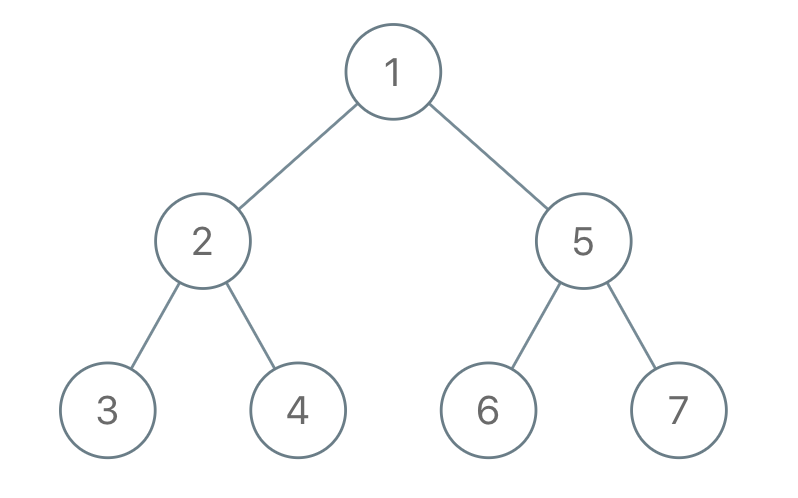

In [ ]:
traversal = "1-2--3--4-5--6--7"

We run a preorder depth-first search (DFS) on the root of a binary tree.

Note that node values should be number.

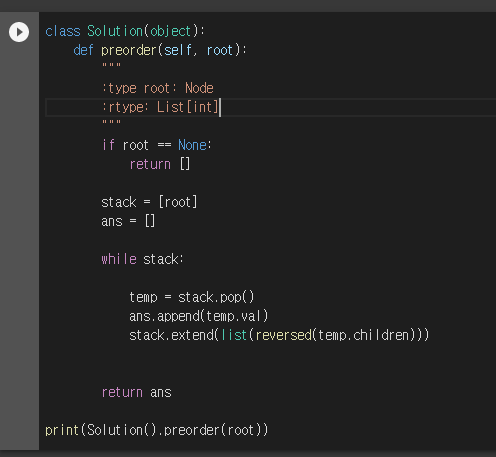

**Pseudocode**

0. Set the 'root' as 'traversal[0]' and cut it out from 'traversal'. Also set 'level' variable as 0. Go to step 2.
<br>

1. Adding node as a child node at the current level (level shifting is already done).

2. Count the number of '-'s in a row via the function 'countLevel(path). Compare it to 'level' and increment 'level' if the count > level, decrement if count < level, else just adding the node at the same level to previous one.

3. When incrementing, shift current node to child node as many times as the level gap.
4. When decrementing, set current node back to parent node as many times as the level gap.
5. If 'else' case, (neither increment or decrement) no shifting is done.

6. In common for the step 2 or 3 or 4, cut the '-'s out from 'traversal'.
<br>

7. Now 'traversal[0]' indicates another node again. Go back to **step 1**.

In [ ]:
#traversal = "1-2--3--4-5--6--7"
#traversal = "1-2--3---5--4---6---7-8--9--10---11"
#traversal = "1"
traversal_len = len(traversal)

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(int(traversal[0]))
cursor = root
traversal = traversal[1:]
level = 1
stack = [root]
child = 0

def countLevel(path):
  for idx, lv in enumerate(path):
    if lv != '-':
      return idx

def countNum(path):
  for idx, lv in enumerate(path):
    if lv == '-':
      return idx

  # if didn't break in for loop 
  return len(path)

def preorder(root):
  if not root: return []

  stack = [root]
  footage = []

  while stack:
    cur_node = stack.pop()
    if cur_node:
      footage.append(cur_node.val)
      stack.append(cur_node.right)
      stack.append(cur_node.left)
  return footage

In [ ]:
while True :
  print(traversal)

  if traversal == '':
    break


  if traversal[0] != '-': # if current i corresponds to any node

    intLen = countNum(traversal)
    stack.append(TreeNode(int(traversal[:intLen]))) # essential when upgoing to parent node
    
    ### Add the node ###
    if cursor.left == None: # if a left child does not exists yet
      cursor.left = stack[-1]
      print(f'Left child added / parent : {cursor.val}, left child : {cursor.left.val}')
      child = 1
    
    else:
      cursor.right = stack[-1]
      child = 2

    traversal = traversal[intLen:]





  else: # if current i indicates level (= '-')
    
    curLv = countLevel(traversal)
    traversal = traversal[curLv:] # modify later for improving the spped by reducing redundant function callings

    if curLv > level: # go deeper
        
      ############ problematic part for TreeNode(4) ###############
      if cursor.right == None:
        cursor = cursor.left # not always go to left (have to go right when le)
      else:
        cursor = cursor.right
      
      level = curLv # refresh the level value


    elif curLv == level: # if a current level is the same to the previous level
      pass # no level shifting, no cursor moving


    else: # should go back to parent -> !!! we should make a stack for the past nodes !!!
      
      for i in range(child): # pop all child nodes in current level
        stack.pop()
      for iter in range(level - curLv): # upshifting level as much as the level gap between previously added node and current node.
        
        stack.pop()

      
      cursor = stack[len(stack)-1]
      print(f"current cursor after shifting level is {cursor.val}")
      print(f"constructed tree so far is {preorder(root)}")

      level = curLv # refresh the level value

Check if my result is the same as an output of preorder traversal.

In [ ]:
def preorder(root):
  if not root: return []

  stack = [root]
  footage = []

  while stack:
    cur_node = stack.pop()
    if cur_node:
      footage.append(cur_node.val)
      stack.append(cur_node.right)
      stack.append(cur_node.left)
  return footage

In [ ]:
preorder(root)

[1]

LeetCode Submission

preorder function & print must be deleted

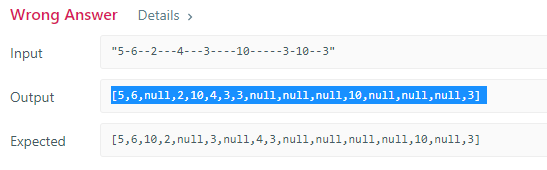

In [ ]:
#traversal = "1-2--3--4-5--6--7"
#traversal = "1-2--3---5--4---6---7-8--9--10---11"
#traversal = "1"
#traversal = "10-7--8"
traversal = "5-6--2---4---3----10-----3-10--3"

class Solution(object):
    def recoverFromPreorder(self, traversal):
        if traversal == '':
          return None

        traversal_len = len(traversal)

        #def preorder(root):
        #  if not root: return []

        #  stack = [root]
        #  footage = []

        #  while stack:
        #    cur_node = stack.pop()
        #    if cur_node:
        #      footage.append(cur_node.val)
        #      stack.append(cur_node.right)
        #      stack.append(cur_node.left)
        #  return footage

        def countNum(path):
          for idx, lv in enumerate(path):
            if lv == '-':
              return idx

          return len(path)

        intLen = countNum(traversal)

        root = TreeNode(int(traversal[:intLen]))
        cursor = root
        traversal = traversal[intLen:]
        level = 1
        stack = [root]
        child = 0

        def countLevel(path):
          for idx, lv in enumerate(path):
            if lv != '-':
              return idx

        
        while True :

          if traversal == '':
            break

          if traversal[0] != '-':

            intLen = countNum(traversal)
            stack.append(TreeNode(int(traversal[:intLen])))
            

            if cursor.left == None: 
              cursor.left = stack[-1]

              print(f'Left child added / parent : {cursor.val}, left child : {cursor.left.val}')
              #print(f'Left child added / parent : {cursor.val}, left child : {cursor.left.val}')

              child += 1
            
            else:
              cursor.right = stack[-1]

              print(f'Right child added / parent : {cursor.val}, right child : {cursor.right.val}')
              #print(f'Right child added / parent : {cursor.val}, right child : {cursor.right.val}')

              child += 1

            traversal = traversal[intLen:]

          else:
            
            curLv = countLevel(traversal)
            traversal = traversal[curLv:]

            if curLv > level: # go deeper
              print(f"condition 1_ go deeper")
              #print(f"condition 1_ go deeper")
              if cursor.right == None:
                cursor = cursor.left
              else:
                cursor = cursor.right
              
              level = curLv
               

              # child should be updated #
              child = 0

            elif curLv == level:
              print(f"condition 2_ no change of phase")
              #print(f"condition 2_ no change of phase")
              pass

            else: # upshifting
              print(f"condition 3_ upshifting")
              print(f"stack before popping is {list(map(lambda x: x.val, stack))}")
              print(f"child : {child}")
              print(f"level gap : {level - curLv}")
              #print(f"condition 3_ upshifting")
              #print(f"stack before popping is {list(map(lambda x: x.val, stack))}")
              #print(f"child : {child}")
              #print(f"level gap : {level - curLv}")
              for i in range(child): # child variable
                stack.pop()
              for iter in range(level - curLv):
                
                stack.pop()
              
              cursor = stack[len(stack)-1]
              print(f"current cursor after shifting level is {cursor.val}")
              print(f"stack after popping is {list(map(lambda x: x.val, stack))}")
              print(f"constructed tree so far is {preorder(root)}")
              #print(f"current cursor after shifting level is {cursor.val}")
              #print(f"stack after popping is {list(map(lambda x: x.val, stack))}")
              #print(f"constructed tree so far is {preorder(root)}")
              level = curLv

              # child should be updated #
              child = 0


        return root



ans = Solution().recoverFromPreorder(traversal)

condition 2_ no change of phase
Left child added / parent : 5, left child : 6
condition 1_ go deeper
Left child added / parent : 6, left child : 2
condition 1_ go deeper
Left child added / parent : 2, left child : 4
condition 2_ no change of phase
Right child added / parent : 2, right child : 3
condition 1_ go deeper
Left child added / parent : 3, left child : 10
condition 1_ go deeper
Left child added / parent : 10, left child : 3
condition 3_ upshifting
stack before popping is [5, 6, 2, 4, 3, 10, 3]
child : 1
level gap : 4
current cursor after shifting level is 6
stack after popping is [5, 6]
constructed tree so far is [5, 6, 2, 4, 3, 10, 3]
Right child added / parent : 6, right child : 10
condition 1_ go deeper
Left child added / parent : 10, left child : 3


when 

In [ ]:
preorder(ans)

[5, 6, 2, 4, 3, 10, 3, 10, 3]

## 27th

### (M) 24. Swap Nodes in Pairs ★

Sample linked list for the test<br>
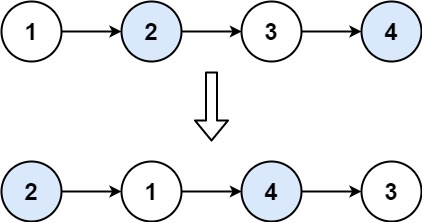

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)

Image from leetcode solution - 44 / 96

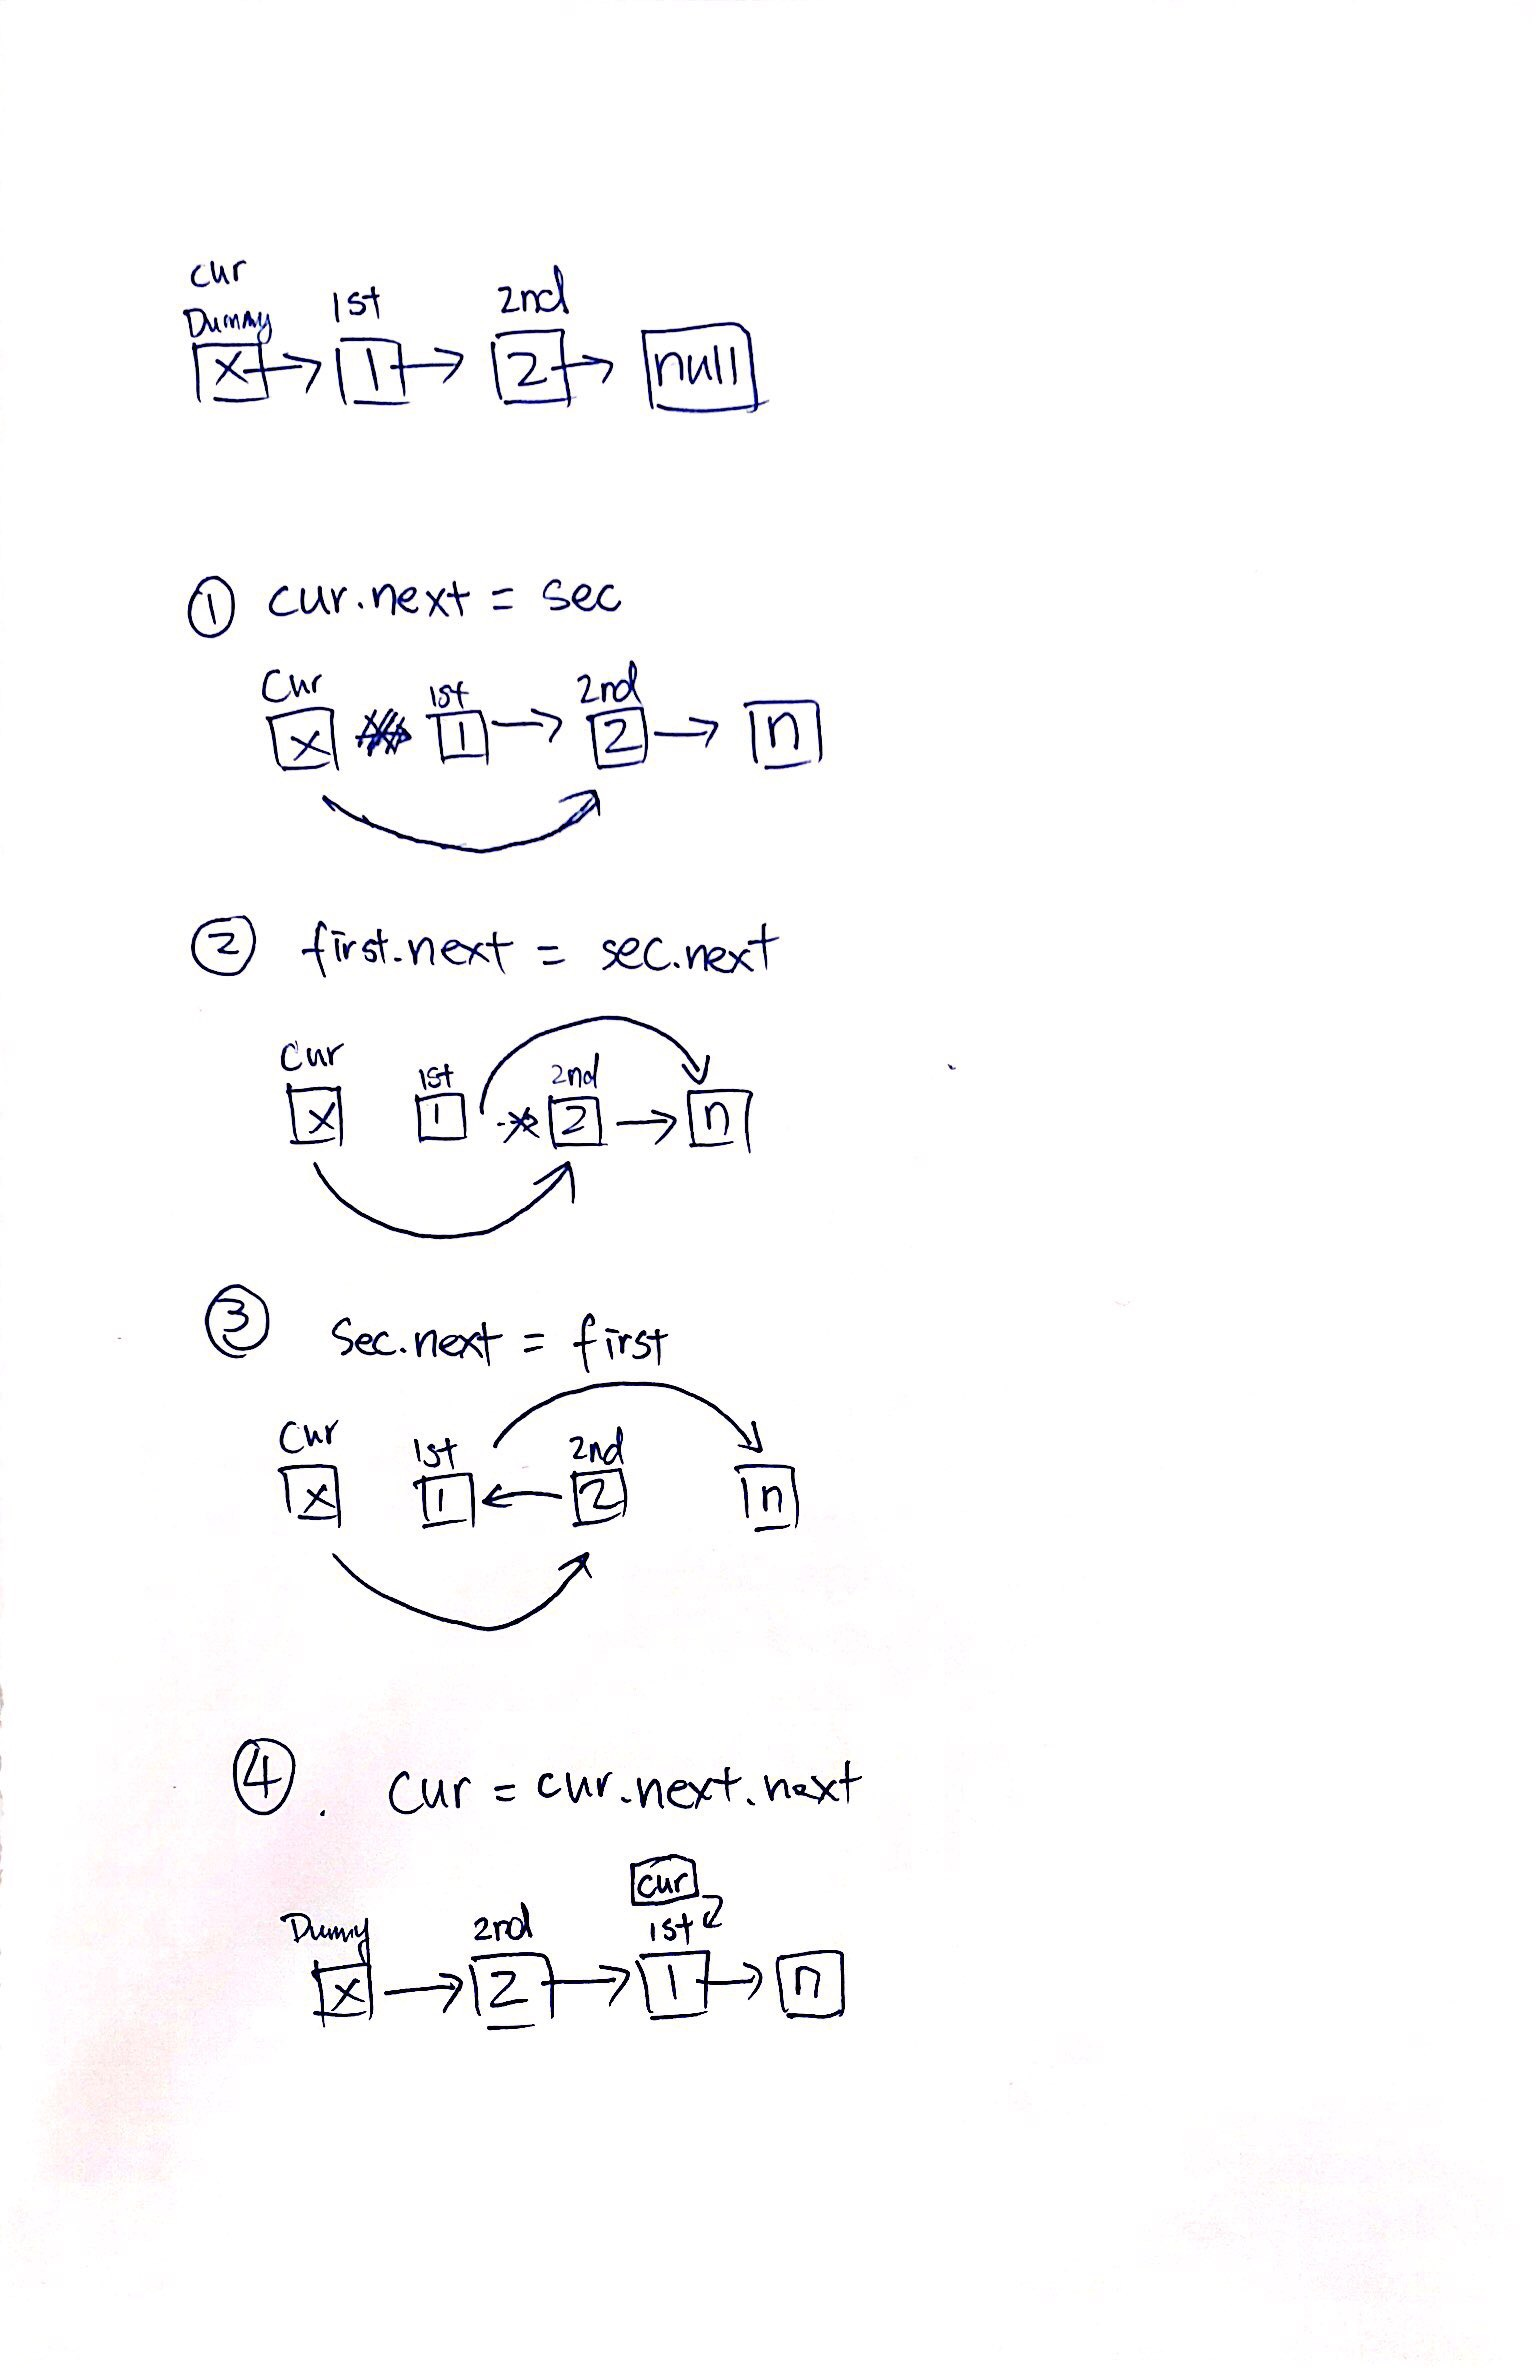

In [ ]:
class Solution(object):
    def swapPairs(self, head):
        if not head or not head.next:
          return head

        dummy = ListNode(0)
        dummy.next = head
        cur = dummy
        
        while cur.next and cur.next.next:
            first = cur.next
            sec = cur.next.next
            
            cur.next = sec
            first.next = sec.next
            sec.next = first
            cur = cur.next.next
        return dummy.next       

### (E) 111. Minimum Depth of Binary Tree

Sample binary tree for the test<br>
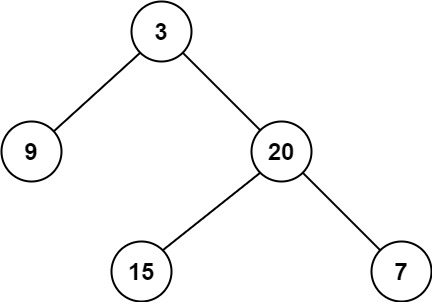

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)

Recursive = 10 / 17

In [ ]:
class Solution(object):
    def minDepth(self, root):
        depths = []

        if root == None: return 0
        def depthCompute(Node, depth):

          if (Node.left == None) and (Node.right == None):
            depths.append(depth)
            return
          
          if Node.left != None:
            depthCompute(Node.left, depth + 1)

          if Node.right != None:
            depthCompute(Node.right, depth + 1)

        depthCompute(root, 1)
        return min(depths)

print(Solution().minDepth(root))

1


Iterative using BFS - 61 / 78

special test case

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(2)
root.right = TreeNode(3)
root.right.right = TreeNode(4)
root.right.right.right = TreeNode(5)

In [ ]:
class Solution(object):
    def minDepth(self, root):

      if root == None: return 0

      queue = [root]
      old = 1
      new = 0
      depth = 1

      while True:


        tmp = queue.pop(0) # pop the element in the front position
        old -= 1

        if (tmp.left == None) and (tmp.right == None):
          break

        
        

        for child in [tmp.left, tmp.right]:
          if child != None:
            queue.append(child)
            new += 1

        if old == 0:
          old = new
          new = 0
          depth += 1

      return depth

print(Solution().minDepth(root))

4


### (E) 104. Maximum Depth of Binary Tree

Recursive - Not a good score

In [ ]:
class Solution(object):
    def maxDepth(self, root):
        depths = []

        if root == None: return 0
        def depthCompute(Node, depth):

          if (Node.left == None) and (Node.right == None):
            depths.append(depth)
            return
          
          if Node.left != None:
            depthCompute(Node.left, depth + 1)

          if Node.right != None:
            depthCompute(Node.right, depth + 1)

        depthCompute(root, 1)
        return max(depths)

print(Solution().minDepth(root))

Iterative - 13 / 34

In [ ]:
class Solution(object):
    def maxDepth(self, root):

      if root == None: return 0

      queue = [root]
      old = 1
      new = 0
      depth = 1

      while queue:


        tmp = queue.pop(0) # pop the element in the front position
        old -= 1
        
        for child in [tmp.left, tmp.right]:
          if child != None:
            queue.append(child)
            new += 1

        if old == 0:
          old = new
          new = 0
          depth += 1

      return depth - 1

          



print(Solution().maxDepth(root))

4


DFS - 37 / 10

In [ ]:
class Solution(object):
    def maxDepth(self, root):
        def dfs(root, depth):
            if not root: return depth
            return max(dfs(root.left, depth + 1), dfs(root.right, depth + 1))
                       
        return dfs(root, 0)